In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


##### Here we can observe that there are no missing values. 

In [12]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### The column id is not giving any information about the customers, so it can be dropped.

In [13]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [14]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'pie chart of Percentage of target class'}, ylabel='Response'>

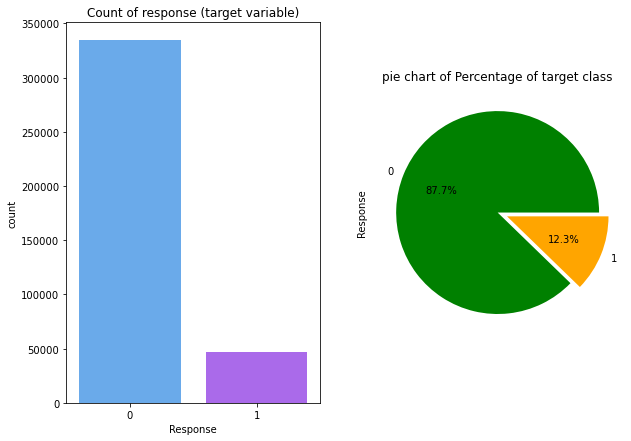

In [17]:
plt.subplot(1, 2, 1)
sns.countplot(train['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


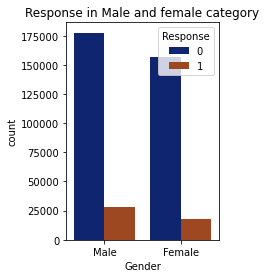

In [23]:
# Plotting 'Response' with gender to understand the respnose ditribution.
plt.subplot(1,2,2) 
sns.countplot(train['Gender'], hue = train['Response'],palette="dark")
plt.title("Response in Male and female category")
plt.show()

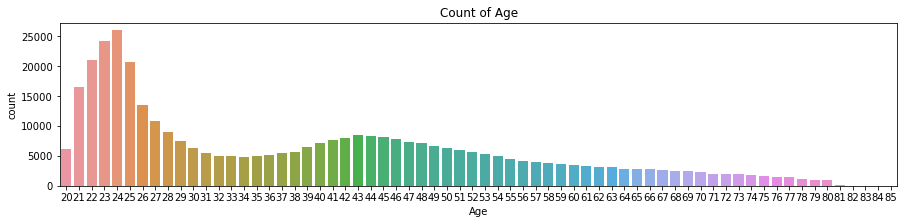

In [28]:
# Checking how the willingness changes based on the age of the customer

plt.figure(figsize = (15,3))
sns.countplot(train['Age'])
plt.title('Count of Age')
plt.show()

By observing the graph we can determine that there is high willigness in the age group of 21 to 25

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

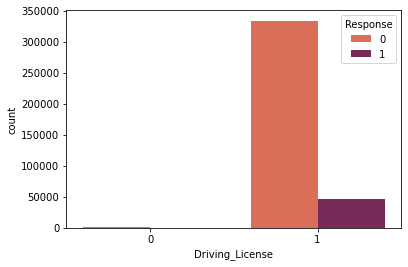

In [43]:
sns.countplot('Driving_License', hue = 'Response',data = train,palette="rocket_r")

Almost all customers who have Driving License are interested in taking the Vehicle Insurance

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

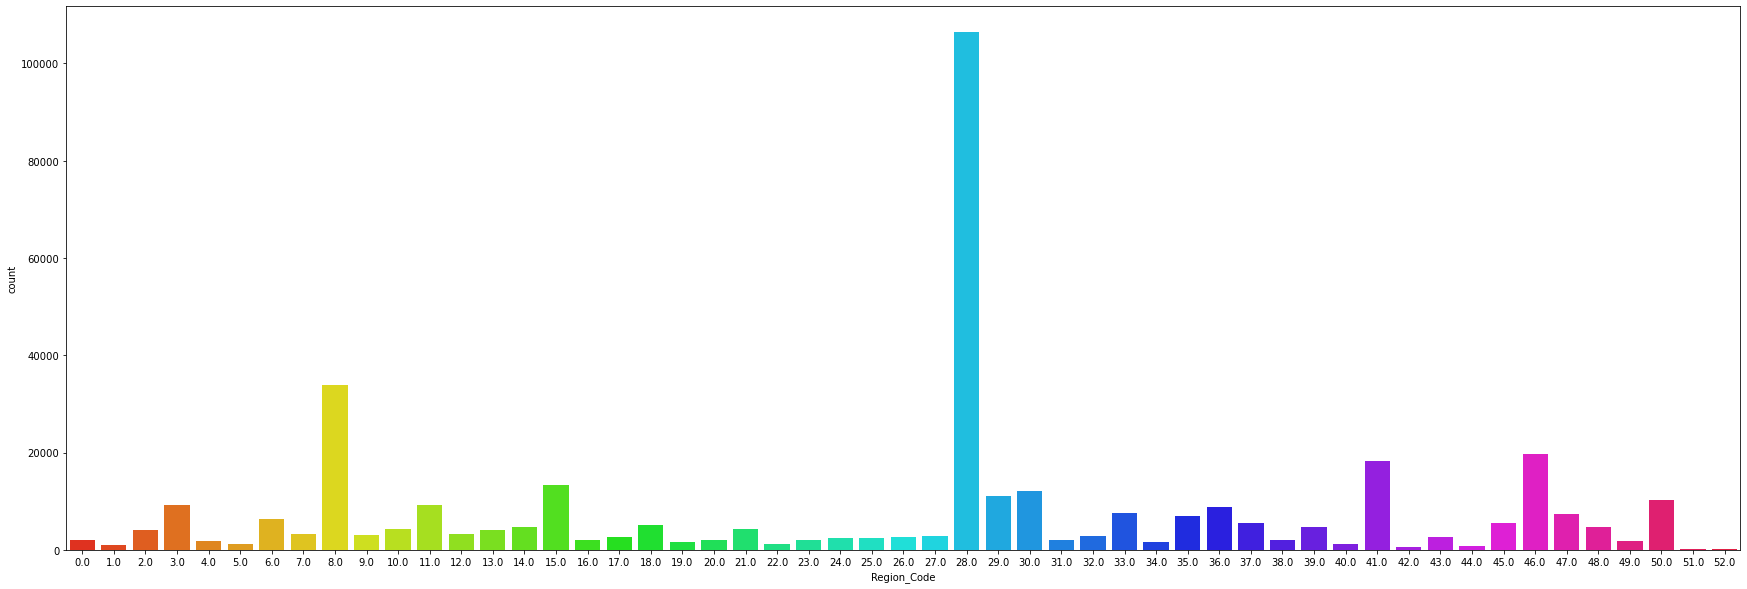

In [47]:
plt.figure(figsize = (30,10))
sns.countplot(train['Region_Code'], palette = 'hsv')

The region code 28 has the highest individuals who are interested in taking the vehicle insurance when compared with other regions.

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

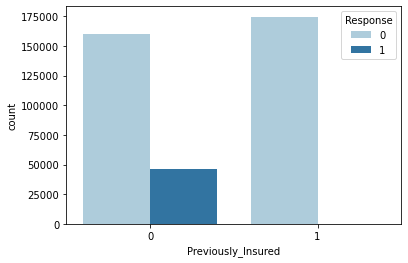

In [51]:
sns.countplot('Previously_Insured', hue = 'Response',data = train,palette="Paired")

People who are not already insuranced are likely to take the Vehicle Insurance. 

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Plot of vechicle age vs response'}, xlabel='Vehicle_Age', ylabel='count'>

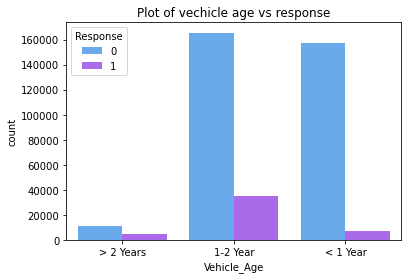

In [52]:
plt.title("Plot of vechicle age vs response")
sns.countplot('Vehicle_Age', hue = 'Response',data = train,palette="cool")

The customers with vehicle age of 1-2 years are more likely to be interested in taking the Vehicle Insurance and the customers with vehicle age of less than 2 years have the least willingness rate.

/Users/nanda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


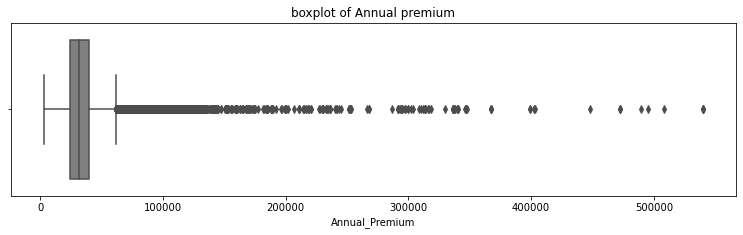

In [57]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'],color='gray')
plt.title("boxplot of Annual premium")
plt.show()

From the above boxplot we can observe that there are a lot of outliers in the variable "Annual_Premium"

<AxesSubplot:title={'center':'Correlation plot'}>

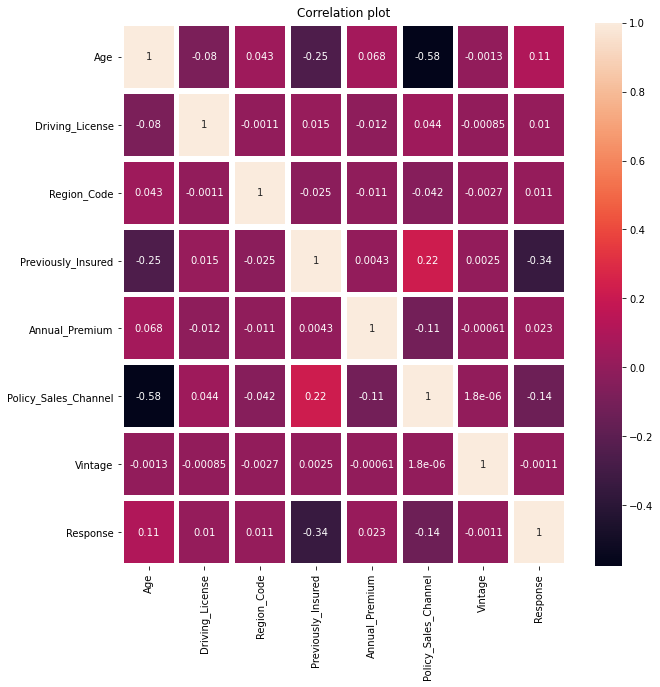

In [67]:
col = train.columns.tolist()
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train[col].corr(),linewidths=5, annot=True)

The above heatmap shows us the correlation of each variable with other variables of the data.